https://mp.weixin.qq.com/s/dKOU4Iv6tTjA6KPB2Re9FA

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('../../dataset/朝阳医院2018年销售数据.xlsx')

In [3]:
dataDF = pd.DataFrame(data)

In [4]:
dataDF.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [6]:
dataDF.rename(columns={'购药时间':'销售时间'},inplace=True)

In [7]:
dataDF = dataDF.dropna()

In [8]:
dataDF.dtypes

销售时间     object
社保卡号    float64
商品编码    float64
商品名称     object
销售数量    float64
应收金额    float64
实收金额    float64
dtype: object

In [9]:
dataDF["销售数量"] = dataDF["销售数量"].astype("f8")
dataDF["应收金额"] = dataDF["应收金额"].astype("f8")
dataDF["实收金额"] = dataDF["实收金额"].astype("f8")

In [10]:
# 定义函数将星期去除
def splitsaletime(timeColser):
    timelist = []
    for t in timeColser:
        timelist.append(t.split(' ')[0])
    timeser = pd.Series(timelist)
    return timeser

In [11]:
t = dataDF.loc[:,'销售时间']
timeser = splitsaletime(t)
dataDF.loc[:,'销售时间'] = timeser

In [12]:
dataDF.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [13]:
# 销售时间转换为日期,如果原始数据不符合日期的格式，转换后的值为NaT
dataDF.loc[:,'销售时间'] = pd.to_datetime(dataDF.loc[:,'销售时间'],errors='coerce')
# 删除为空的行
dataDF = dataDF.dropna()

In [14]:
pd.set_option('display.max_rows',1000)

In [15]:
# 按销售时间进行升序排序
dataDF = dataDF.sort_values(by='销售时间',ascending=True)

In [16]:
# 重置索引
dataDF = dataDF.reset_index(drop=True)

In [17]:
# 将‘'销售数量'’这一列中小于0的数据排除掉
pop = dataDF.loc[:,'销售数量'] > 0
dataDF = dataDF.loc[pop,:]

In [18]:
# 删除重复数据
kpi1_Df = dataDF.drop_duplicates(subset=['销售时间', '社保卡号'])
totall = kpi1_Df.shape[0]
print('总消费次数：', totall)

总消费次数： 5342


In [19]:
# 按销售时间升序排序
kpi1_Df = kpi1_Df.sort_values(by='销售时间',ascending=True)
# 重置索引
kpi1_Df = kpi1_Df.reset_index(drop=True)

In [20]:
kpi1_Df.tail()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
5337,2018-07-19,1.166693e+07,865099.0,硝苯地平片(心痛定),2.0,2.4,2.0
5338,2018-07-19,1.001914e+10,865099.0,硝苯地平片(心痛定),2.0,2.4,2.0
5339,2018-07-19,1.001426e+10,871158.0,厄贝沙坦片(吉加),2.0,34.0,30.0
5340,2018-07-19,1.054283e+07,865425.0,G苯磺酸氨氯地平片(6盒/疗程),6.0,69.0,57.5
5341,2018-07-19,1.040022e+08,861435.0,缬沙坦胶囊(代文),5.0,179.0,171.4


In [21]:
# 最小时间值
startTime = kpi1_Df.loc[0, '销售时间']
# 最大时间值
endTime = kpi1_Df.loc[totall - 1, '销售时间']
# 计算天数
daysI = (endTime - startTime).days
# 月份数
monthsI = daysI // 30
# 计算月平均消费次数
kpi1_I = totall // monthsI
print('业务指标1：月均消费次数=', kpi1_I)

2018-01-01 00:00:00 2018-07-19 00:00:00
5342 6
业务指标1：月均消费次数= 890


In [22]:
# 总消费金额
totalMoneyF = dataDF.loc[:,'实收金额'].sum()
# 月均消费金额
monthMoneyF = totalMoneyF / monthsI
print('业务指标2：月均消费金额=', monthMoneyF)

业务指标2：月均消费金额= 50668.35166666666


In [23]:
# 客单件 = 总消费金额/总消费次数
pct = totalMoneyF / totall
print('业务指标3：客单价=', pct)

业务指标3：客单价= 56.909417821040805


In [24]:
import matplotlib.pyplot as plt
# 画图时用于显示中文字符
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # SimHei黑体的意思
# 在操作之前先复制一份数据，防止影响清洗后的数据
groupDF = dataDF

C:\Users\jianghaitao1\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '实收金额')

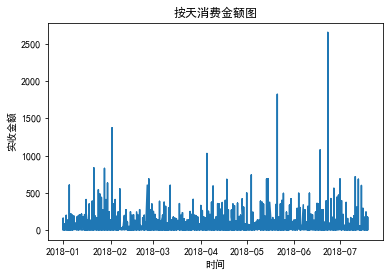

In [25]:
# 重命名行（index）为销售时间所在列的值
groupDF.index = groupDF['销售时间']
# 画图
plt.plot(groupDF['实收金额'])
plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('实收金额')

In [28]:
# 将销售时间聚合按月分组
gb = groupDF.groupby(groupDF.index.month)
# 计算每个月的消费总额
monthDf = gb.sum()

In [29]:
monthDf

,社保卡号,商品编码,销售数量,应收金额,实收金额
销售时间,,,,,
1,6.257155e+12,1.073329e+09,2527.0,53561.6,49461.19
2,4.702493e+12,7.438598e+08,1858.0,42028.8,38790.38
3,6.124761e+12,1.007946e+09,2225.0,45318.0,41597.51
4,7.610117e+12,1.219604e+09,3005.0,54296.3,48787.84
5,5.898556e+12,1.004573e+09,2225.0,51263.4,46925.27
6,5.421001e+12,9.289637e+08,2328.0,52300.8,48327.70
7,3.608900e+12,6.259256e+08,1483.0,32568.0,30120.22


Text(0, 0.5, '实收金额')

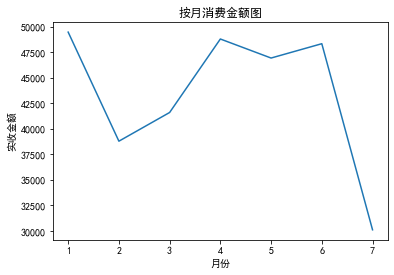

In [30]:
# 描绘按月消费金额图
plt.plot(monthDf['实收金额'])
plt.title('按月消费金额图')
plt.xlabel('月份')
plt.ylabel('实收金额')